# 改良版損益分岐点簡易計算機

入荷量を入力してください:  1000
最低発注数量 (MOQ) を入力してください:  500
MOQの1商品あたりの原価を入力してください:  120
自社の1商品あたりの卸値を入力してください:  150
在庫をなくすべき期間を月単位で入力してください:  7


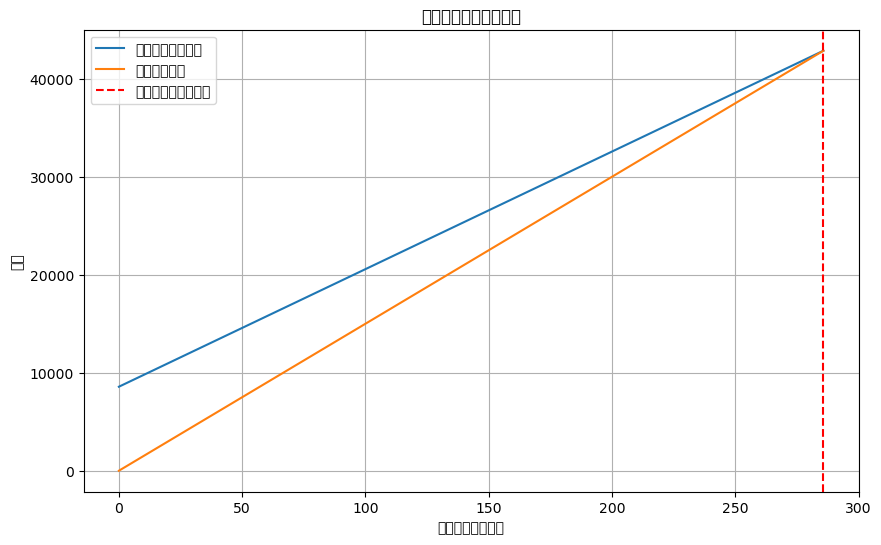

月ごとの損益分岐点: 285.71428571428567 商品


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# 日本語フォントを設定
plt.rcParams['font.family'] = 'IPAexGothic'
# 入力受取部分
try:
    入荷量 = float(input("入荷量を入力してください: "))
    MOQ = float(input("最低発注数量 (MOQ) を入力してください: "))
    MOQの原価 = float(input("MOQの1商品あたりの原価を入力してください: "))
    自社の卸値 = float(input("自社の1商品あたりの卸値を入力してください: "))
    在庫をなくすべき期間 = float(input("在庫をなくすべき期間を月単位で入力してください: "))
except ValueError:
    print("適切な数字を入力してください。")
    exit()

# パラメータ計算
月ごとの固定費 = (MOQ * MOQの原価) / 在庫をなくすべき期間
一商品あたりの利益 = 自社の卸値 - MOQの原価
月ごとの販売数 = 入荷量 / 在庫をなくすべき期間

# 損益分岐点を計算 (毎月の)
損益分岐点_販売数 = 月ごとの固定費 / 一商品あたりの利益

# 販売数量の範囲を設定
sales = np.linspace(0, 2 * 月ごとの販売数, 100)

# 各販売数量に対する固定費、変動費、総費用を計算
fixed_costs_array = np.full_like(sales, 月ごとの固定費)
variable_costs_array = MOQの原価 * sales
total_costs = fixed_costs_array + variable_costs_array

# 販売数量に対する売上を計算
revenue = 自社の卸値 * sales

# 図を描画
plt.figure(figsize=(10, 6))
plt.plot(sales, total_costs, label='月ごとの合計費用')
plt.plot(sales, revenue, label='月ごとの売上')
plt.axvline(x=損益分岐点_販売数, color='r', linestyle='--', label='月ごとの損益分岐点')
plt.legend()
plt.grid(True)
plt.xlabel('月ごとの販売数量')
plt.ylabel('金額')
plt.title('月ごとの損益分岐分析')
plt.show()

print(f"月ごとの損益分岐点: {損益分岐点_販売数} 商品")
